In [729]:
# import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import plot_precision_recall_curve,precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [730]:
path = "D:/svm/training1.csv"

In [731]:
df = pd.read_csv(path)

In [732]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [733]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [734]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [735]:
#There are 4920 rows, 133 columns
df.shape

(4920, 133)

In [736]:
df.isnull().sum().sort_values(ascending=False)

prognosis               0
malaise                 0
nausea                  0
loss_of_appetite        0
pain_behind_the_eyes    0
                       ..
internal_itching        0
toxic_look_(typhos)     0
depression              0
irritability            0
itching                 0
Length: 133, dtype: int64

In [737]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [680]:
#looking how much percent each diseases having
df['prognosis'].value_counts(normalize = True)

Drug Reaction                              0.02439
Pneumonia                                  0.02439
Common Cold                                0.02439
Gastroenteritis                            0.02439
Arthritis                                  0.02439
Fungal infection                           0.02439
Urinary tract infection                    0.02439
Paralysis (brain hemorrhage)               0.02439
(vertigo) Paroymsal  Positional Vertigo    0.02439
GERD                                       0.02439
Chicken pox                                0.02439
Malaria                                    0.02439
Hyperthyroidism                            0.02439
Osteoarthristis                            0.02439
Heart attack                               0.02439
Hepatitis D                                0.02439
Diabetes                                   0.02439
Hypothyroidism                             0.02439
Migraine                                   0.02439
Hypertension                   

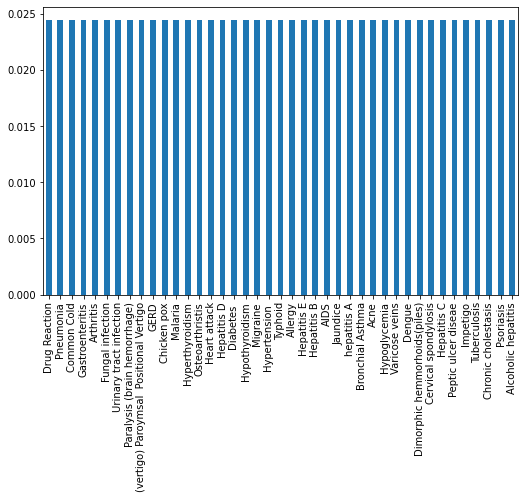

In [738]:
#as we can see each no. of diseases having the same percentage through bar chart
df['prognosis'].value_counts(normalize = True).plot.bar()
plt.subplots_adjust(left = 0.9, right = 2, top = 2, bottom =1 )

In [739]:
#checking if there are any other data types
df.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

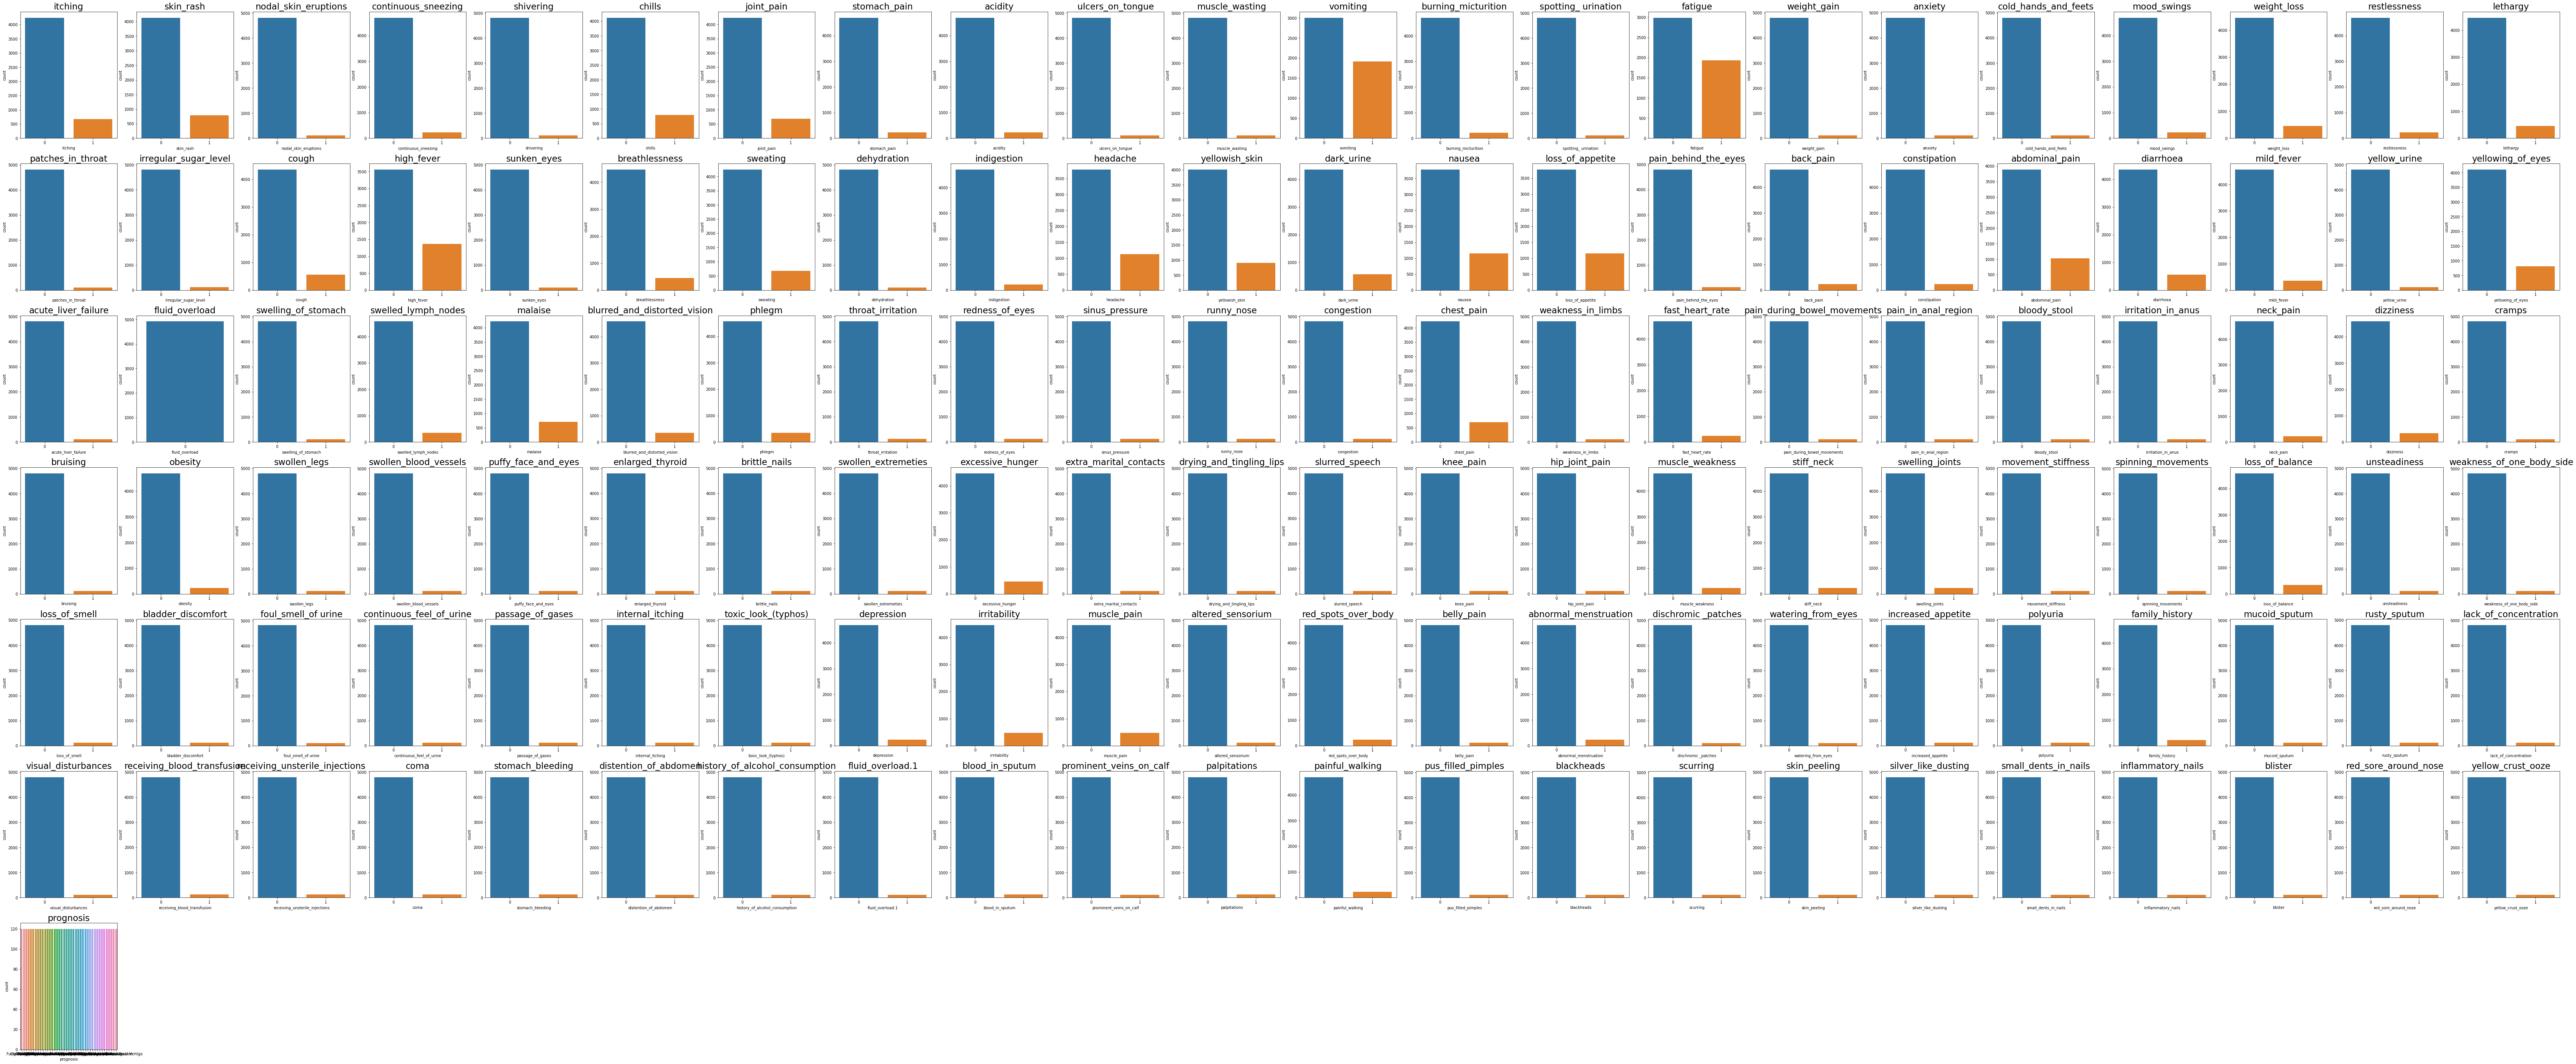

In [740]:
#Analyzing each symptoms/variable
for x in range(df.shape[1]):
  plt.subplot(7,22,x+1)
  plt.subplots_adjust(left = 0.5, right = 16, top = 10, bottom = 0.5)
  sns.countplot(df[df.columns[x]]).set_title(df.columns[x],fontsize = 23)

In [741]:
#separated the independent and dependent values to respective variables
#data cleaning
x = df.drop(['prognosis'],axis=1)
y = df['prognosis']

In [742]:
from sklearn.model_selection import train_test_split #import train_test_split function

In [743]:
from sklearn import svm #import svm model


In [744]:
#split datasets into training sets and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
#70% training and #30% test 

x_test


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
4893,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2790,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
629,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [745]:
svm_model = SVC(kernel='poly',degree=7,probability=True)
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(x_train))*100}")
 
print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, y_pred)*100}")

Accuracy on train data by SVM Classifier: 91.17305458768872
Accuracy on test data by SVM Classifier: 89.70189701897019


Precision:  0.8970189701897019
Recall:  0.8970189701897019
F1 Score: 0.897018970189702


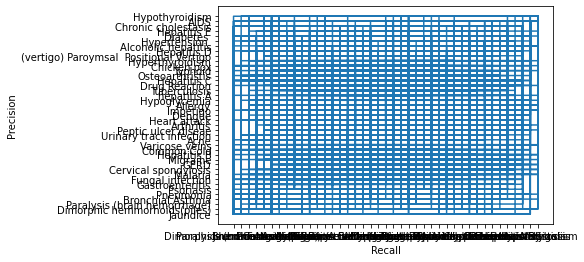

In [747]:
precision = precision_score(y_test, y_pred,average='micro')
                                        
recall = recall_score(y_test, y_pred,average='micro')
 
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score:',f1_score(y_test, y_pred,average='micro'))
#print('F1 Score:',2*precision*recall/(precision+recall))
disp = PrecisionRecallDisplay(y_test, y_pred)
disp.plot()
#disp = plot_precision_recall_curve(svm_model,y_test, y_pred)
#precision, recall, _ = precision_recall_curve(y_test,y_pred)
#disp = PrecisionRecallDisplay(precision=precision, recall=recall)

#disp.show()
#plt.show()

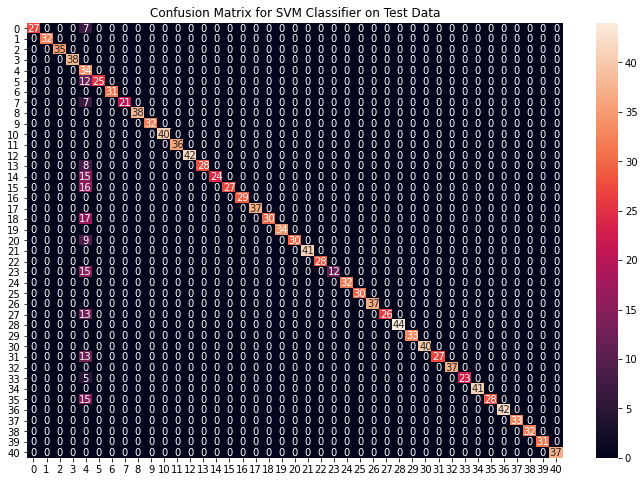

In [748]:
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

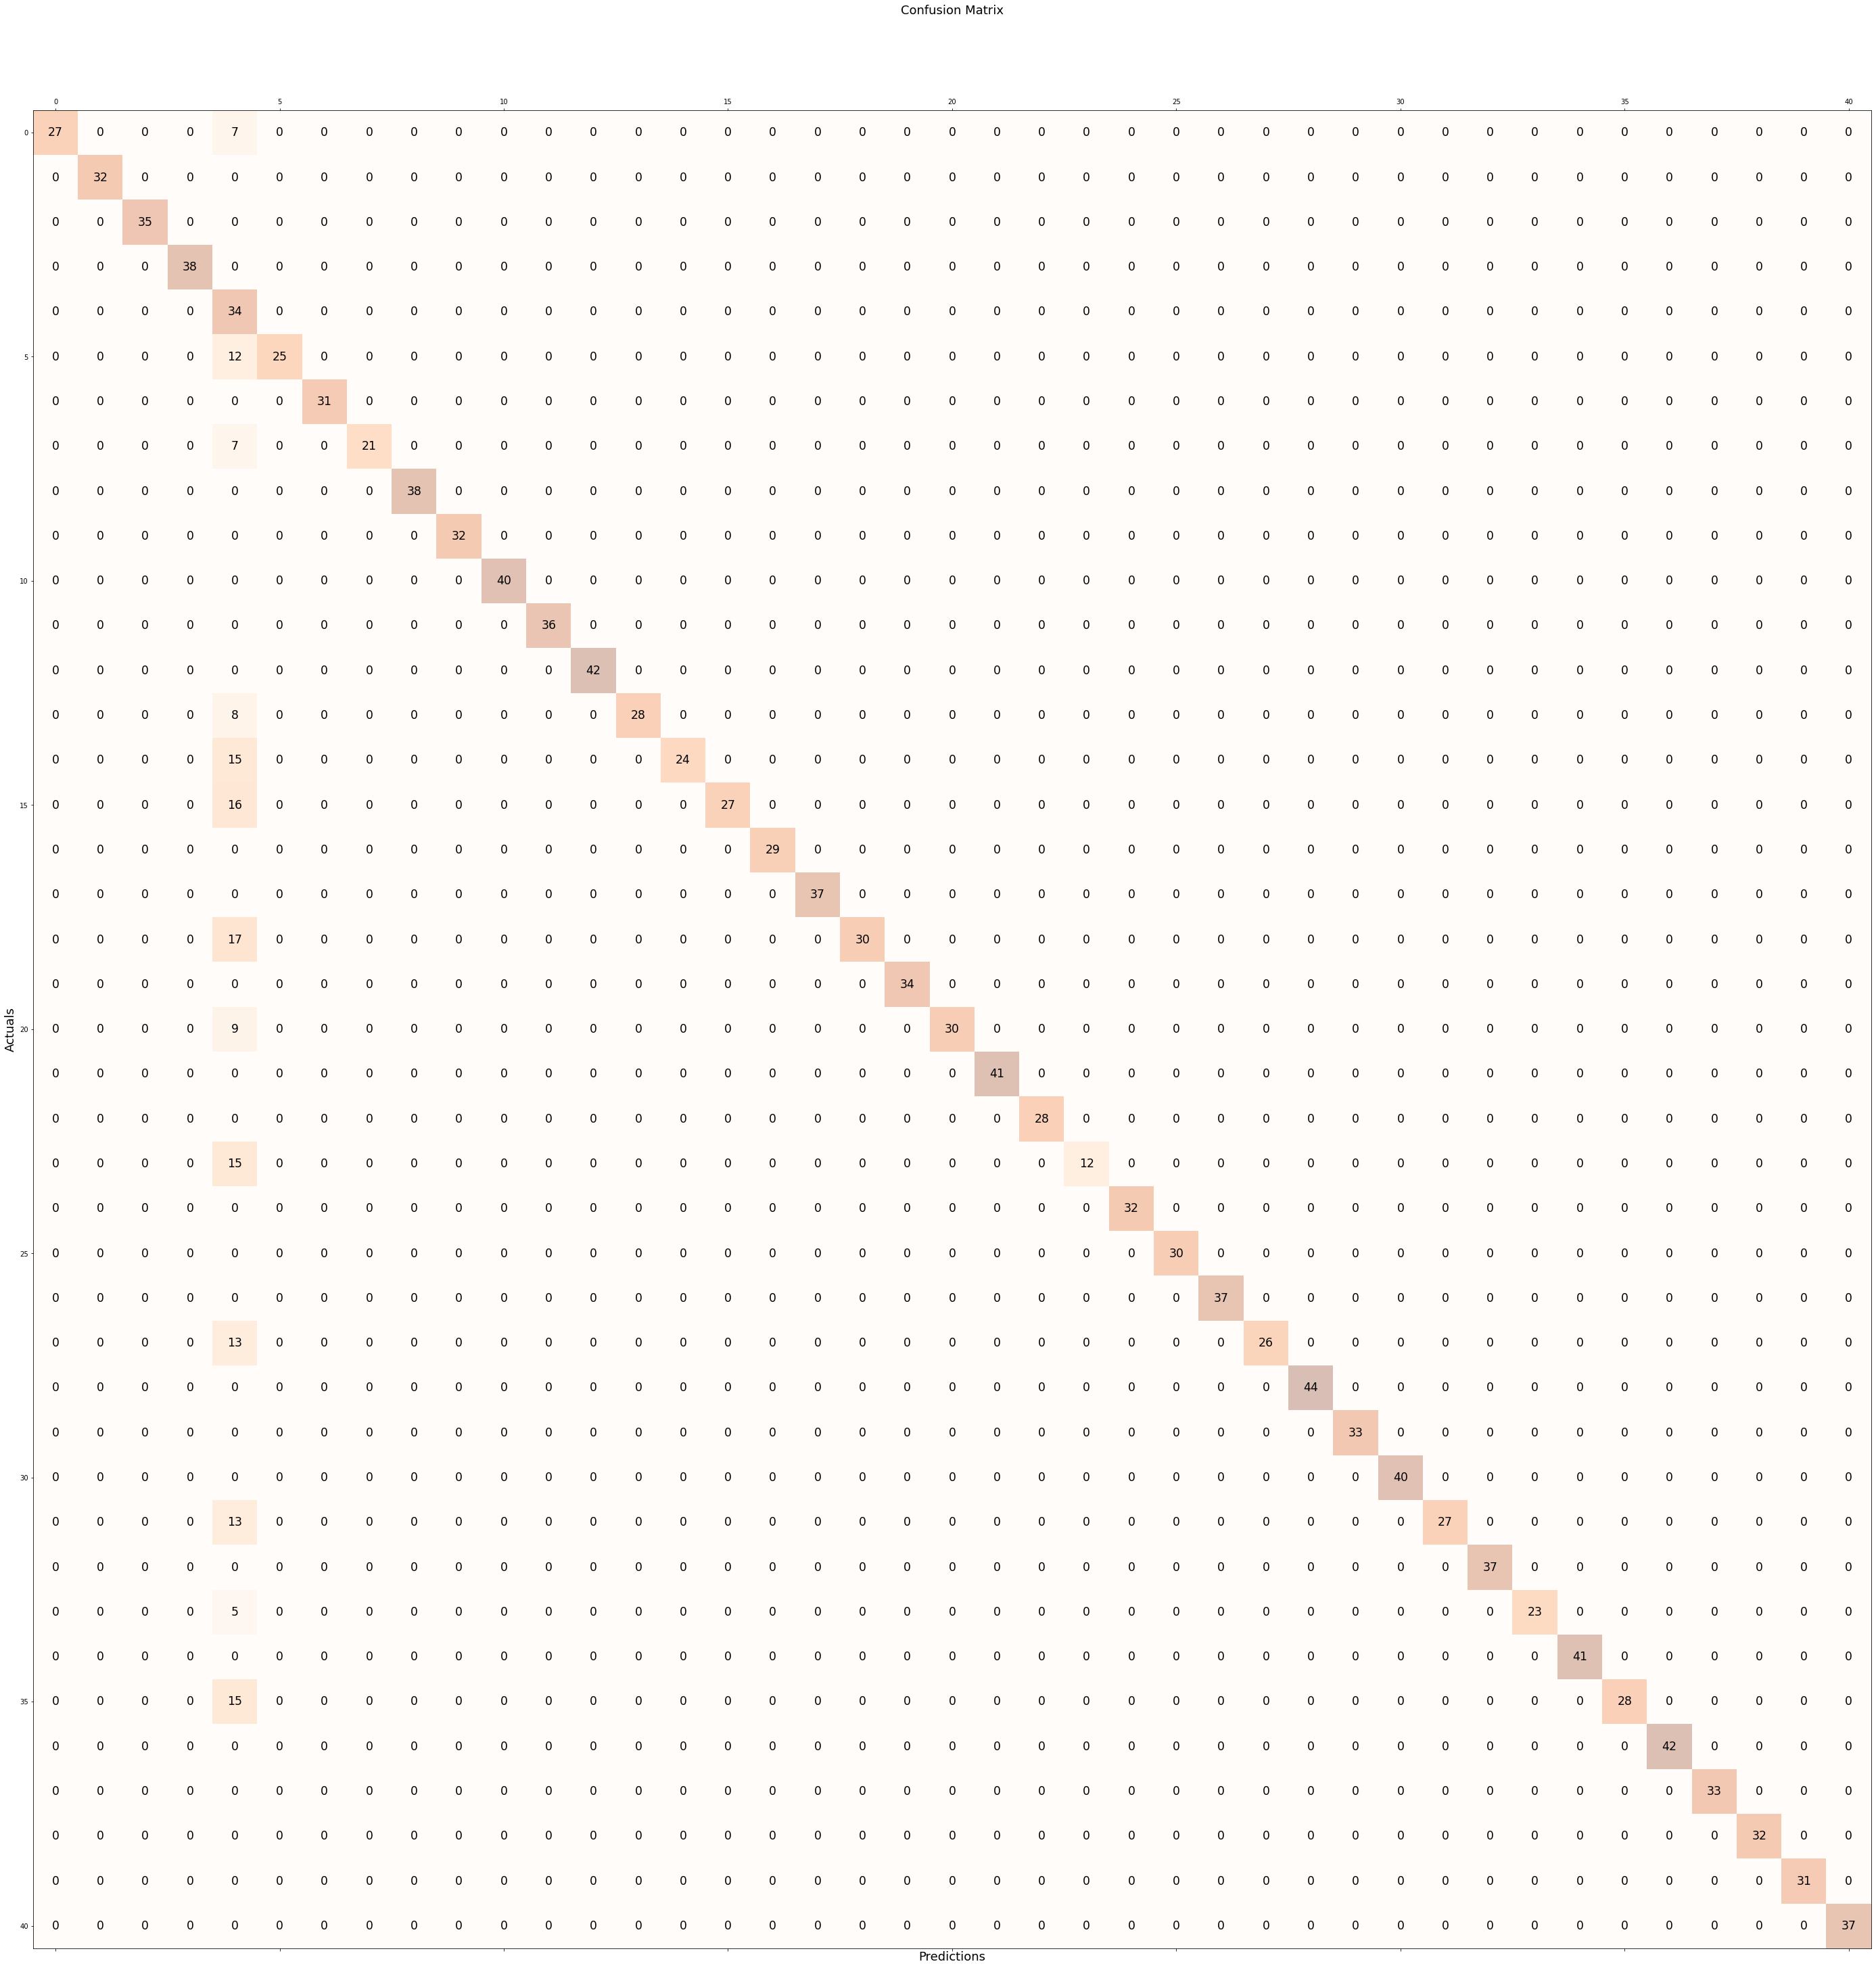

In [749]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(50, 50))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [750]:
svm_model.fit(x_train,y_train)

SVC(degree=7, kernel='poly', probability=True)

In [751]:
# Model Accuracy on test data
svm_model.score(x_test, y_test)

0.8970189701897019

In [752]:
import pickle

In [755]:
with open('D:/svm/trained_svmmodel', 'wb') as files:
    pickle.dump(svm_model, files)